In [4]:
from tensorflow.keras.models import load_model


def predict(image):
    model = load_model('./app/models/20231007-115307.keras')

    # Show the model architecture
    # print(model.summary())

    predictions = model(image)

    return predictions


def predict_anime(image):
    model = load_model('./app/models/anime.h5')

    # Show the model architecture
    # print(model.summary())

    predictions = model(image)

    return predictions



In [67]:
file_name = 'sketch.jpg'

In [68]:
from PIL import Image
import numpy as np

image = Image.open(file_name).resize((256,256)).convert("RGB")
        
# Convert the PIL image to a NumPy array
image_np = np.array(image)

image_np = (image_np / 127.5) - 1

# Data needs to be in batch size = 1
input_image = np.expand_dims(image_np, axis=0)

In [75]:
prediction = predict_anime(input_image)

In [76]:
prediction = prediction.numpy()
prediction = (prediction + 1 ) * 127.5
prediction = prediction.astype(np.uint8)

output_image_data = prediction[0]

# Convert prediction into image
output_image = Image.fromarray(output_image_data)


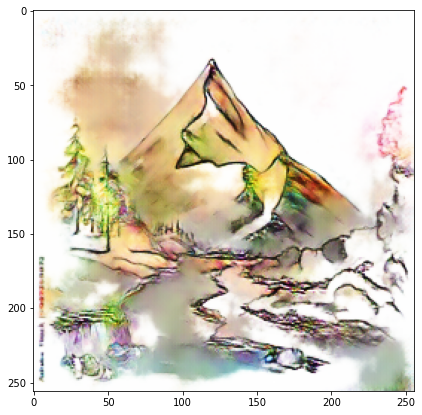

In [77]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7, 7))
plt.imshow(output_image)